# Data Preprocessing
Column Description

course_id: the course identifier.
userid_DI: the user identifier.
registered: whether the user registered for the course.
viewed: anyone who accessed the 'Courseware tab' in the edX platform.
explored: anyone who accessed at least half of the chapters in the courseware.
certified: anyone who earned a certificate.
final_cc_cname_DI: country name or continent/region name.
LoE: highest level of education.
YoB: year of birth.
gender: male, female, or other.
grade: final grade in the course.
start_time_DI: date of course registration
last_event_DI: date of last interaction in course. Blank if none beyond registration.
nevents: number of interactions with the course (blank if done beyond registration).
ndays_act: number of unique days student interacted with the course.
nplay_video: number of play video events.
nchapters: number of chapters within the Courseware with which the students interacted.
nforum_posts: number of posts to the discussion forum.
roles: identifies staff and instructors.
incomplete flag: identifies records that are internally inconsistent. This includes missing tracking logs.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [2]:
# Load files
data1 = pd.read_csv('data/HMXPC13_DI_v2_5-14-14.csv')
#data2 = pd.read_csv('data/modeling_data.csv')
#data3 = pd.read_csv('data/visualize.csv')

In [3]:
data1

,course_id,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,roles,incomplete_flag
0,HarvardX/CB22x/2013_Spring,MHxPC130442623,1,0,0,0,United States,NaN,NaN,NaN,0,2012-12-19,2013-11-17,NaN,9.0,NaN,NaN,0,NaN,1.0
1,HarvardX/CS50x/2012,MHxPC130442623,1,1,0,0,United States,NaN,NaN,NaN,0,2012-10-15,NaN,NaN,9.0,NaN,1.0,0,NaN,1.0
2,HarvardX/CB22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,0,2013-02-08,2013-11-17,NaN,16.0,NaN,NaN,0,NaN,1.0
3,HarvardX/CS50x/2012,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,0,2012-09-17,NaN,NaN,16.0,NaN,NaN,0,NaN,1.0
4,HarvardX/ER22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,0,2012-12-19,NaN,NaN,16.0,NaN,NaN,0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641133,MITx/6.00x/2013_Spring,MHxPC130184108,1,1,0,0,Canada,Bachelor's,1991.0,m,NaN,2013-09-07,2013-09-07,97.0,1.0,4.0,2.0,0,NaN,NaN
641134,MITx/6.00x/2013_Spring,MHxPC130359782,1,0,0,0,Other Europe,Bachelor's,1991.0,f,NaN,2013-09-07,2013-09-07,1.0,1.0,NaN,NaN,0,NaN,NaN
641135,MITx/6.002x/2013_Spring,MHxPC130098513,1,0,0,0,United States,Doctorate,1979.0,m,NaN,2013-09-07,2013-09-07,1.0,1.0,NaN,NaN,0,NaN,NaN
641136,MITx/6.00x/2013_Spring,MHxPC130098513,1,1,0,0,United States,Doctorate,1979.0,m,NaN,2013-09-07,2013-09-07,74.0,1.0,14.0,1.0,0,NaN,NaN


In [4]:
#Data Explorarty
"""Important Features

ages: the binned age of the student.
education: the highest level of education attained by the student.
subject: the subject of the course.
final_cc_cname: the country of origin of the student.
gender: the gender of the participant.
course: the actual name of the course."""
data1['target'] = data1.explored | data1.certified

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


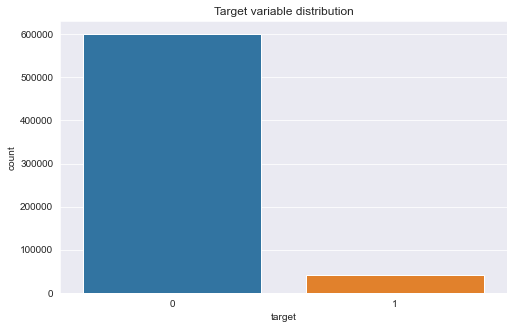

In [5]:
# Target variable distribution
sns.set_style('darkgrid')
plt.figure(figsize=(8, 5))
sns.countplot(data1["target"])
plt.title('Target variable distribution')
plt.show()

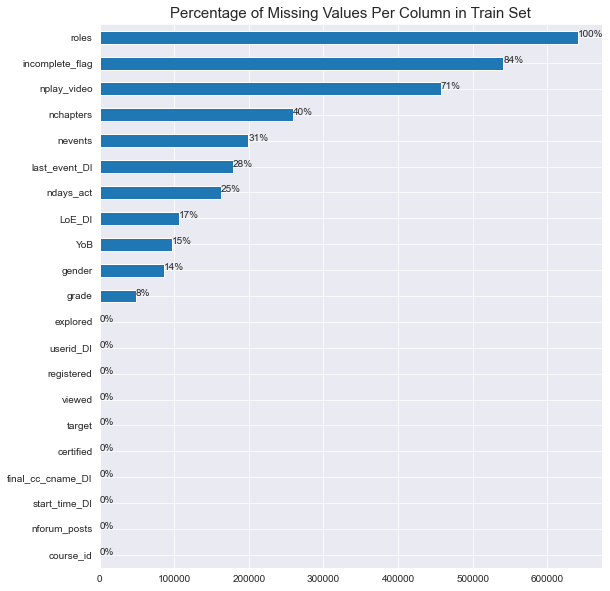

In [6]:
# Plot missing values in train set
ax =data1.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/data1.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

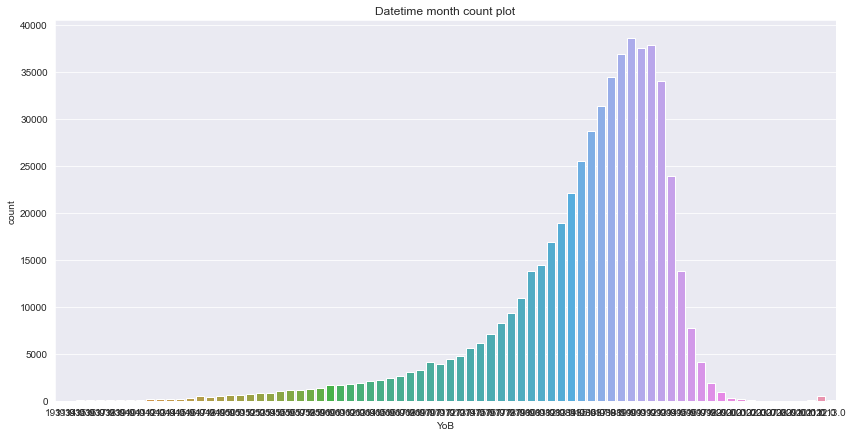

In [7]:
# Datetime month countplot
plt.figure(figsize = (14, 7))
sns.countplot(x = 'YoB', data = data1)
plt.title('Datetime month count plot')
plt.show()

In [8]:
#Drop coloumns with high NA rates and less important features
data1.drop(columns = ['roles','grade', \
                             'nevents', 'nplay_video', 'incomplete_flag', \
                            'nchapters', 'registered'], axis = 1, inplace = True)


In [9]:
#Get rid of missing values
data1 = data1.dropna()

In [10]:
#we don't need 'Other' in gender
data1 = data1[data1.gender!='o']

In [11]:
#Reset index after we drop missing values
data1.set_index(np.arange(len(data1)), inplace = True)

In [12]:
#Difference between first and last date to login

data1['month_started'] = data1.start_time_DI.apply(lambda x: x.split('-')[1])


In [13]:
#don't include 70s and older in order to avoid multicollinearity
data1['>=70'] = np.where(data1.YoB <=1953, 1, 0)
data1['60s'] = np.where((data1.YoB > 1953) & (data1.YoB <= 1963), 1, 0)
data1['50s'] = np.where((data1.YoB > 1963) & (data1.YoB <= 1973), 1, 0)
data1['40s'] = np.where((data1.YoB > 1973) & (data1.YoB <= 1983), 1, 0)
data1['30s'] = np.where((data1.YoB > 1983) & (data1.YoB <= 1993), 1, 0)
data1['25_to_30'] = np.where((data1.YoB > 1993) & (data1.YoB <= 1998), 1, 0)
data1['20_to_25'] = np.where((data1.YoB > 1998) & (data1.YoB <= 2003), 1, 0)
data1['under_20'] = (np.where(data1.YoB > 2003, 1, 0))
data1.drop(columns=['YoB'], inplace=True)

In [14]:
data1['last_event_DI'] = pd.to_datetime(data1['last_event_DI'])
data1['start_time_DI'] = pd.to_datetime(data1['start_time_DI'])

data1['last-start']=data1['last_event_DI']-data1['start_time_DI']
data1.drop(columns = ['start_time_DI'], inplace=True)

In [15]:
def splitdate(x):
    return x.split('')[0]
data1['last-start'] = data1['last-start'].tolist()
#data1['last-start'] = data1['last-start'].apply(lambda x: )
data1['last-start']

0        368 days
1        153 days
2        247 days
3        356 days
4         32 days
           ...   
373381     0 days
373382     0 days
373383     0 days
373384     0 days
373385     0 days
Name: last-start, Length: 373386, dtype: timedelta64[ns]

In [16]:
data1 =  pd.get_dummies(data1,\
        columns = [ 'final_cc_cname_DI', 'LoE_DI','gender'\
                   ,'month_started'])\
                  .drop(columns = ['gender_m'])

In [17]:
#viewed is 1 in every single row, carries no additional information
data1.drop(columns = ['viewed'], axis = 1, inplace = True)

In [18]:
data1.drop(columns = ['userid_DI', 'course_id','certified','explored'], inplace = True)
data1.drop(columns = ['last_event_DI'], inplace = True)
data1.to_csv('data/mydata.csv')

In [165]:
#We will try to handle the imbalance dataset


# Modeling

In [20]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [8]:
# Load files
df = pd.read_csv('data/mydata.csv')

In [10]:
df.columns

Index(['Unnamed: 0', 'ndays_act', 'nforum_posts', 'target', '>=70', '60s',
       '50s', '40s', '30s', '25_to_30', '20_to_25', 'under_20', 'last-start',
       'final_cc_cname_DI_Australia', 'final_cc_cname_DI_Bangladesh',
       'final_cc_cname_DI_Brazil', 'final_cc_cname_DI_Canada',
       'final_cc_cname_DI_China', 'final_cc_cname_DI_Colombia',
       'final_cc_cname_DI_Egypt', 'final_cc_cname_DI_France',
       'final_cc_cname_DI_Germany', 'final_cc_cname_DI_Greece',
       'final_cc_cname_DI_India', 'final_cc_cname_DI_Indonesia',
       'final_cc_cname_DI_Japan', 'final_cc_cname_DI_Mexico',
       'final_cc_cname_DI_Morocco', 'final_cc_cname_DI_Nigeria',
       'final_cc_cname_DI_Other Africa', 'final_cc_cname_DI_Other East Asia',
       'final_cc_cname_DI_Other Europe',
       'final_cc_cname_DI_Other Middle East/Central Asia',
       'final_cc_cname_DI_Other North & Central Amer., Caribbean',
       'final_cc_cname_DI_Other Oceania',
       'final_cc_cname_DI_Other South America

In [32]:
df['last-start']=df['last-start'].map(lambda x : x.split(' ')[0])

In [33]:
df['last-start'] = pd.to_numeric(df['last-start'])

In [39]:
# Use a utility from sklearn to split and shuffle your dataset.
train_df, test_df = train_test_split(df, test_size=0.2)
train_df, val_df = train_test_split(train_df, test_size=0.2)


# Form np arrays of labels and features.
train_labels = np.array(train_df.pop('target'))
val_labels = np.array(val_df.pop('target'))
test_labels = np.array(test_df.pop('target'))

In [35]:
train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)
print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

Training features shape: (238966, 65)
Validation features shape: (59742, 65)
Test features shape: (74678, 65)


In [36]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      keras.layers.Dense(
          16, activation='relu',
          input_shape=(train_features.shape[-1],)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(learning_rate=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

In [37]:
EPOCHS = 100
BATCH_SIZE = 2048

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_prc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)


model = make_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                1056      
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,073
Trainable params: 1,073
Non-trainable params: 0
_________________________________________________________________


In [42]:
#df['last-start'].astype(str).astype(int)
train_features = np.asarray(train_features).astype(np.float32)
model.predict(train_features[:10])

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [43]:
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights)

In [44]:
model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [45]:
def plot_loss(history, label, n):
  # Use a log scale on y-axis to show the wide range of values.
  plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train ' + label)
  plt.semilogy(history.epoch, history.history['val_loss'],
               color=colors[n], label='Val ' + label,
               linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')

plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

NameError: name 'zero_bias_history' is not defined

In [46]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels))

Epoch 1/100
117/117 [==============================] - 4s 17ms/step - loss: 7215.0122 - tp: 5927.0000 - fp: 66702.0000 - tn: 208056.0000 - fn: 18023.0000 - accuracy: 0.7164 - precision: 0.0816 - recall: 0.2475 - auc: 0.5021 - prc: 0.0808 - val_loss: 1418.3572 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 54982.0000 - val_fn: 4760.0000 - val_accuracy: 0.9203 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5000 - val_prc: 0.0797
Epoch 2/100
117/117 [==============================] - 0s 3ms/step - loss: 2307.9619 - tp: 3002.0000 - fp: 33149.0000 - tn: 186627.0000 - fn: 16188.0000 - accuracy: 0.7935 - precision: 0.0830 - recall: 0.1564 - auc: 0.5038 - prc: 0.0814 - val_loss: 911.3420 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 54982.0000 - val_fn: 4760.0000 - val_accuracy: 0.9203 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5000 - val_prc: 0.0797
Epoch 3/100
117/117 [==============================] - 0s 3ms/step - loss: 1071.2023 - tp: 2

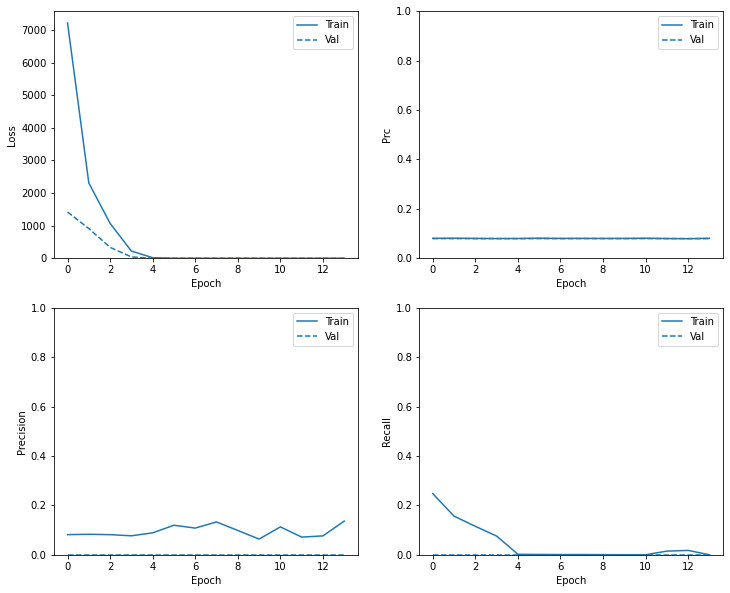

In [49]:
def plot_metrics(history):
  metrics = ['loss', 'prc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend();

plot_metrics(baseline_history)